In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm

## Análise exploratória do dataset base de hapiness score

# Objetivo: 

A partir de um dataset de hapiness score, obtido a partir de perguntas feitas à população, será construído, nesse projeto, uma regressão para ter uma fórmula que meça o hapiness score, com base em  dados concretos.

In [3]:
dataset = pd.read_csv('hapiness_score_2015.csv')
dataset.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
h = dataset.loc[:,]
data_idx=h.set_index("Country")
data_idx.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
gdp = pd.read_excel('GDP_lido.xlsx')
gdp.head()

i = gdp.loc[:,]
gdp_idx = i.set_index('País')
gdp_idx.head()

,GDP em 2015
País,
Afghanistan,2.11
Albania,3.82
Algeria,2.10
Andorra,0.00
Angola,2.46


In [6]:
df = gdp_idx.join(data_idx, how='inner')

ter = df.loc[:,['GDP em 2015', 'Happiness Score']]

ter.head()

,GDP em 2015,Happiness Score
Afghanistan,2.110,3.575
Albania,3.820,4.959
Algeria,2.100,5.605
Angola,2.460,4.033
Argentina,-0.128,6.574


In [7]:
exp = pd.read_excel('expecativa.xlsx')
exp.head()

exp_2015 = exp.loc[:,['Life expectancy', 2015]]
exp_better_2015 = exp_2015.dropna()
exp_better_2015.head()

expp = exp_better_2015.rename(columns={2015:'Expectativa de vida'})

exp_idx = expp.set_index('Life expectancy')

dff = ter.join(exp_idx, how='inner')

dff.head()

,GDP em 2015,Happiness Score,Expectativa de vida
Afghanistan,2.110,3.575,53.8
Albania,3.820,4.959,78.0
Algeria,2.100,5.605,76.4
Angola,2.460,4.033,59.6
Argentina,-0.128,6.574,76.5


       GDP em 2015  Happiness Score  Expectativa de vida
count   145.000000       145.000000           145.000000
mean      2.945842         5.401469            72.495862
std       2.793562         1.171994             8.128729
min      -2.520000         2.839000            47.100000
25%       1.500000         4.518000            67.100000
50%       2.600000         5.253000            74.700000
75%       3.780000         6.302000            79.100000
max      27.900000         7.587000            83.300000


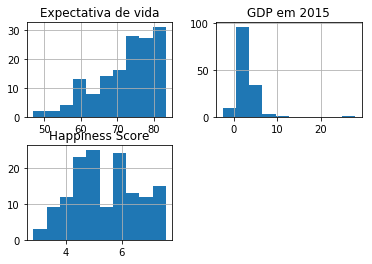

In [8]:
print(dff.describe());
dff.hist();

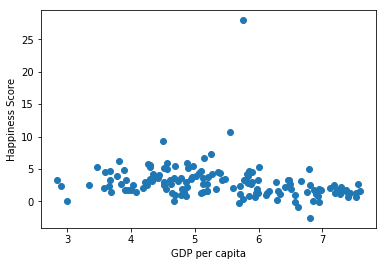

,GDP em 2015,Happiness Score,Expectativa de vida
GDP em 2015,1.000000,-0.220570,-0.227385
Happiness Score,-0.220570,1.000000,0.737686
Expectativa de vida,-0.227385,0.737686,1.000000


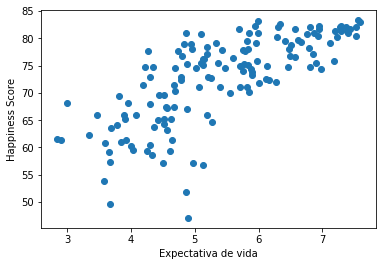

In [9]:
plt.scatter(dff["Happiness Score"],dff["GDP em 2015"]);
plt.xlabel("GDP per capita");
plt.ylabel("Happiness Score");
plt.show()

plt.scatter(dff["Happiness Score"],dff["Expectativa de vida"]);
plt.xlabel("Expectativa de vida");
plt.ylabel("Happiness Score");

dff.corr()

# dff["GDP em 2015"].describe()
# dff['GDP em 2015'].plot.box()

In [10]:
xc = sm.add_constant(dff["Happiness Score"]) #serve para incluir um beta zero, que é uma constante inicial
model = sm.OLS(dff["Happiness Score"],dff["GDP em 2015"]) 
results = model.fit() #gera o relatório com os dados calculados.
results.summary() #coloar o nome das coisas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           5.12e-21
Time:                        21:13:00   Log-Likelihood:                -408.93
No. Observations:                 145   AIC:                             819.9
Df Residuals:                     144   BIC:                             822.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GDP em 2015     0.9249      0.083     11.079      0.000       0.760       1.090
==============================================================================
Omnibus:                      125.460   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2438.662
Skew:                          -2.840   Prob(JB):                         0.00
Kurtosis:                      22.271   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como o r-square indica o quão o modelo é bom para prever algo a partir dele, o nosso é razoável pois tem 46% de probabilidade de prever algo. O p-value do modelo é bastante baixo indicando que as variáveis x e y são correlacionadas, indicando heterocedasticidade.
A estatistica de teste f indica que os betas são reais, diferentes de zero  visto que suas probabilidades deles serem zero é muito baixa. Além disso o teste Omnibus indica que há baixa probabilidade das variáveis se distribuirem sendo uma normal.


In [11]:
model = sm.OLS(dff["Happiness Score"],dff["Expectativa de vida"]) 
results = model.fit() #gera o relatório com os dados calculados.
results.summary() #coloar o nome das coisas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     6252.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          1.59e-120
Time:                        21:13:00   Log-Likelihood:                -178.58
No. Observations:                 145   AIC:                             359.2
Df Residuals:                     144   BIC:                             362.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Expectativa de vida     0.0749      0.001     79.072      0.000       0.073       0.077
==============================================================================
Omnibus:                       10.192   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.055
Skew:                           0.006   Prob(JB):                        0.132
Kurtosis:                       2.181   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Já na regressão linear entre expectativa de vida e happiness score, temos que o modelo tem uma confiabilidade de 96%, além disso, a probabilidade de f é bastante baixa, de modo a indicar que os betas são reias não nulos. E a probabilidade dos coeficientes não serem correlacionados é baixa também, visto que a probabilidade de t quebra a hipótese nula.

In [30]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

X3 = dff[["GDP em 2015","Expectativa de vida"]]
results3 = regress(X3, dff["Happiness Score"])
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     85.78
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           3.75e-25
Time:                        21:25:42   Log-Likelihood:                -170.83
No. Observations:                 145   AIC:                             347.7
Df Residuals:                     142   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1079      0.630     -3.347      0.001      -3.353      -0.863
GDP em 2015            -0.0234      0.024     -0.961      0.338      -0.071       0.025
Expectativa de vida     0.1045      0.008     12.502      0.000       0.088       0.121
==============================================================================
Omnibus:                        2.939   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                1.946
Skew:                          -0.020   Prob(JB):                        0.378
Kurtosis:                       2.434   Cond. No.                         697.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""